In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


# Rýchla exploratórna analýza pre zoznámenie sa s dátami

Postup:

1. Načátanie súboru
2. Zistenie počtu záznamov, premenných, typy premenných
3. Zistenie či súbor obsahuje chábajúce pozorovania ("missing values") a vysporiadanie sa s nimi
4. Zistnie počtu unikátnych hodnôt kategorických premenných a uváženie možnosti zlúčenia niekotrých do jednej skupiny
5. Vyšetrenie základných štatistických ukazovateľov pre jednotlivé premenné 

In [16]:
df = pd.read_csv('C:/Users/zamec/Desktop/M7DataSp/cvičenie 1/house-prices-advanced-regression-techniques/HousePricesAll.csv')

In [17]:
print(df.shape) 

(2919, 81)


Vidíme, že dátový súbor obsahuje ako numerické (int64, float64), tak aj kategorické premenné (object).

In [18]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


Už z prvého nahliadnutia na dáta vidíme, že súbor obsahuje chýbajúce pozorovania, na ktoré sa zameriame v ďalšej časti kódu.

In [19]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Z tabuľky nižšie vidíme, že niektoré premenné obsahujú viac ako 90% ch7bajúcich pozorovaní, preto sa pre neskoršiu prácu zbavíme stĺpčekov: **PoolQC, Fence, MiscFeature, Alley, FireplaceQu**.

In [20]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive

Čo sa týka ďalších premenných, ktoré sú "podozrivé" tým, že majú rovnaký počet chýbajúcih pozorovaní tak sú:

- **MasVnrType, MasVnrType** - majú m.v. v rovnakých riadkoch 
- **GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond** -  opäť, majú m.v. v tých istých riadkoch 
- **BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2** - majú m.v. skoro v identických riadkoch.


Ako to vyriešiť? Bolo by lákavé ich odstrániť a v prípade použitia modelu lineárnej regresie by to aj bolo vhodené, ale pre náš prípad použitia NN, môžu poskytnúť dodatočnú informáciu (napr. typ garáže a súčasne rok stavby, tak to môže mať skrytý význam "Čim staršia tým skôr poskytnem menej údajov").

In [21]:
###################################################################
skuska = df['MasVnrType'].isnull().array
skuska1 = df['MasVnrType'].isnull().array

np.argwhere(skuska) == np.argwhere(skuska1)

###################################################################

df[["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]].isnull().any(axis=1).sum()


###################################################################

df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isnull().any(axis=1).sum()

88

### Vyšetrenie kategorických premenných

V určitých prípadoch by pre kategorické premenné s vysokým počtom kategórií (v porovnaní s ostatnými premennými) bolo vhodné najmenšie frekventované kategórie zlúčiť do jednej. V našom prípade by sa o tom dalo uvažovať pri premenných  **Exterior1st, Exterior2nd, Neighborhood**.

Z nizších histogramov vidíme, že pri všetkých by sa dalo uvažovať o zlúčení posledných 3, resp. 4 kat., avšak vzhľadom k celkovému počtu hodnôt jednotlivých premenných to nespravíme (nehovoriac o tom, že by sme opäť mohli prísť o určitú časť informácie).

In [23]:
categoricalColumns = []
for name in df.columns:
    
    if df.dtypes[name] == "O":
        categoricalColumns.append(name)
        print( "The column %s has: %d categories" %(name,len(df[name].unique())))
               

The column MSZoning has: 6 categories
The column Street has: 2 categories
The column Alley has: 3 categories
The column LotShape has: 4 categories
The column LandContour has: 4 categories
The column Utilities has: 3 categories
The column LotConfig has: 5 categories
The column LandSlope has: 3 categories
The column Neighborhood has: 25 categories
The column Condition1 has: 9 categories
The column Condition2 has: 8 categories
The column BldgType has: 5 categories
The column HouseStyle has: 8 categories
The column RoofStyle has: 6 categories
The column RoofMatl has: 8 categories
The column Exterior1st has: 16 categories
The column Exterior2nd has: 17 categories
The column MasVnrType has: 5 categories
The column ExterQual has: 4 categories
The column ExterCond has: 5 categories
The column Foundation has: 6 categories
The column BsmtQual has: 5 categories
The column BsmtCond has: 5 categories
The column BsmtExposure has: 5 categories
The column BsmtFinType1 has: 7 categories
The column Bsmt

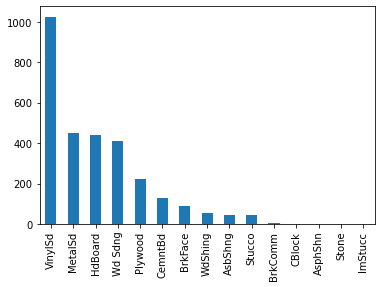

In [24]:
plt.figure(1)
df['Exterior1st'].value_counts().plot(kind='bar')
plt.show()


<AxesSubplot:>

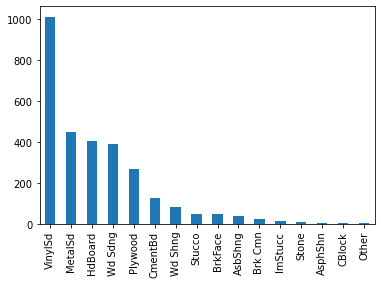

In [25]:
%matplotlib inline

df['Exterior2nd'].value_counts().plot(kind='bar')




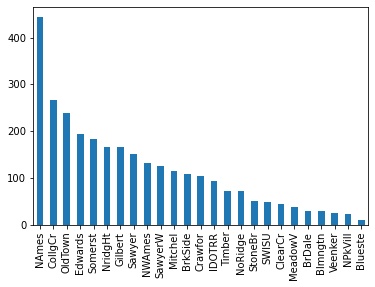

In [26]:
%matplotlib inline

df['Neighborhood'].value_counts().plot(kind='bar')
plt.show()

### Vyšetrenie numerických premenných

Keď si všimneme chábaj=uce pozorovania pre jednotlivé num. premenné, tak vidíme, že väčšina obsahuje 1 až 2 m.v. To je opäť dosť podozrivé a preto ak sa pozrieme, kde sa chábajúce záznamy nachádzajú, tak sú v rovnakých riadkoch. V tomto prípade nám 2 záznamy chýbať nebudú a uľahčíme si tým prácu preto, pre premenné **BsmtFinSF1,...,GarageArea** vypustíme dané riadky. 

Čo sa týka **LotFrontage,GarageYrBlt**, tak tieto premenné už obsahujú dosť m.v. avšak vzhľadom k celkovému počtu to nie je až také veľké číslo, zároveň však pre nás je to dosť záznamov, preto chýbajúce hodnoty doplníme. Sú rôzne techniky ako to spraviť.
Najrozumnejšie by bolo využuť KNN imputer, ktorý doplňuje čisla na základe priemeru "najbližších hodnôt" (mal som všk problém s načítaním knižnice). Zvolili sme doplnenie mediánu danej premennej.

In [31]:
integerDrop = []

for i in range(df.shape[1]):
    if (df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64') and df.isna().sum()[i]:
        
        print("In Column %s is %d missing values" %(df.columns[i],df.isna().sum()[i]))
        
        if df.isna().sum()[i] < 24:
            integerDrop.append(df.columns[i])
            
        

In Column LotFrontage is 486 missing values
In Column MasVnrArea is 23 missing values
In Column BsmtFinSF1 is 1 missing values
In Column BsmtFinSF2 is 1 missing values
In Column BsmtUnfSF is 1 missing values
In Column TotalBsmtSF is 1 missing values
In Column BsmtFullBath is 2 missing values
In Column BsmtHalfBath is 2 missing values
In Column GarageYrBlt is 159 missing values
In Column GarageCars is 1 missing values
In Column GarageArea is 1 missing values


Nakoniec sa pozrieme na prehľad štatistických hodnôt ako sú medián, priemer, kvantily, min, max.... Z nich by sa dali určiť zakrivenia rozdelení (poprípade normalita) pre jednotlivé premenné a v prípade potreby (normality dát pre lineárne reg. modely) by sa dali dáta transformovať napr. pomocou logarytmickej transformácie.

Keď sa pozrieme na naše dáta a to čo náás zaujíma, tj. variabilita, tak vidíme, že dáta majú rôzne intervaly z ktorých môžz nadobúdať hodnoty. Preto bude potrebné použiť metódu aby sme ich dostali na rovnakú škálu (nekôr použiujeme MinMax). Je to z toho dôvodu aby hodnoty jednej premennnej nemali omnoho vyššiu váhu ako zvyšné (čo nemusí zodpovedať realite).

In [122]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,738.534247,57.628425,69.351027,10526.872432,6.090753,5.581336,1970.879281,1985.217466,1166.172945,343.366438,...,0.083904,0.0,0.000856,0.868151,0.065925,0.002568,0.007705,0.013699,0.823630,0.086473
std,426.218170,42.885239,22.647897,9103.374843,1.399712,1.139113,30.487414,20.617394,387.454368,436.380655,...,0.277363,0.0,0.029260,0.338472,0.248257,0.050637,0.087479,0.116287,0.381298,0.281181
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1953.000000,1967.000000,885.750000,0.000000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,746.500000,50.000000,68.000000,9444.500000,6.000000,5.000000,1972.000000,1994.000000,1088.000000,0.000000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1112.250000,70.000000,78.000000,11665.500000,7.000000,6.000000,2000.000000,2004.000000,1408.250000,721.250000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,1872.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
